# Import Datasets

Import required pandas and numpy libraries.

In [1]:
#import all required libraries and more
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/seattle/calendar.csv
/kaggle/input/seattle/listings.csv
/kaggle/input/seattle/reviews.csv


Import the datasets into relative pandas variables.

In [2]:
#read the calendar.csv file to pandas dataframe named 'df_calendar'
df_calendar = pd.read_csv('../input/seattle/calendar.csv')

#read the listings.csv file to pandas dataframe named 'df_listings'
df_listings = pd.read_csv('../input/seattle/listings.csv')

#read the reviews.csv file to pandas dataframe named 'df_reviews'
df_reviews = pd.read_csv('../input/seattle/reviews.csv')

In [3]:
#check out the first five rows of the recently defined datasets to gauge what is inside each file and what can be useful
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


-----------------------------------------------------------------------------------------------------------------------------------------------------

# Clean Datasets

**calendar.csv Cleansing**

In [6]:
#find the metadata of the 'df_calendar' dataset
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [7]:
#find the which of columns that have null values and how many and how many of them. 
df_calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

Convert the relevant column data to their proper data types.

*This needs to do this since the keras deep learning model that is going to be used later, will only be looking at non-null values which are either integers or floats, since these values have to be entered through a set hidden layers which will perform mathematical operations on them. There will be multiple layers having multiple neurons.*

In [8]:
df_calendar['listing_id'] = df_calendar['listing_id'].astype(str)

In [9]:
df_calendar['price'].fillna(0, inplace=True)

#defining this function here is useful since it will be used again for the same purpose, i.e. to clean listings.csv
def remove_symbol(price):
    """remove the symbols ['$', ','] in price"""
    if type(price) is str:
        return re.sub("[\$,]",'',price)
    return price

df_calendar['price'] = df_calendar.price.apply(remove_symbol)
df_calendar['price'] = df_calendar['price'].astype(float)

Check the updated data types.

In [10]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   listing_id  1393570 non-null  object 
 1   date        1393570 non-null  object 
 2   available   1393570 non-null  object 
 3   price       1393570 non-null  float64
dtypes: float64(1), object(3)
memory usage: 42.5+ MB


**listings.csv Cleansing**

*Basically repeating the same steps as cleaning 'df_calendar.*

In [11]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

Choose the useful columns only, and store them in separate dataset.

*Here, only a few columns are required which will be used in the prediction model. Therefore, these columns are copied onto a new dataframe, which will be worked upon rather than 'df_listings'.*

In [12]:
df_listings_new = df_listings[['id','accommodates','bathrooms','bedrooms','beds','price','extra_people','minimum_nights','review_scores_rating','instant_bookable']]

Check updated info.

In [13]:
df_listings_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3818 non-null   int64  
 1   accommodates          3818 non-null   int64  
 2   bathrooms             3802 non-null   float64
 3   bedrooms              3812 non-null   float64
 4   beds                  3817 non-null   float64
 5   price                 3818 non-null   object 
 6   extra_people          3818 non-null   object 
 7   minimum_nights        3818 non-null   int64  
 8   review_scores_rating  3171 non-null   float64
 9   instant_bookable      3818 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 298.4+ KB


In [14]:
df_listings_new.isnull().sum()

id                        0
accommodates              0
bathrooms                16
bedrooms                  6
beds                      1
price                     0
extra_people              0
minimum_nights            0
review_scores_rating    647
instant_bookable          0
dtype: int64

Remove the null values, along with changing the relative dattypes to either floats or integers, which can be easily used by the keras deep learning model.

In [15]:
df_listings_new['id'] = df_listings_new['id'].astype(str)

df_listings_new['price'].fillna(0, inplace=True)

df_listings_new['price'] = df_listings_new.price.apply(remove_symbol)

df_listings_new['price'] = df_listings_new['price'].astype(float)

df_listings_new['review_scores_rating'].fillna(0, inplace=True)
df_listings_new['bathrooms'].fillna(0, inplace=True)
df_listings_new['beds'].fillna(0, inplace=True)
df_listings_new['price'].fillna(0, inplace=True)
df_listings_new['bedrooms'].fillna(0, inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

Check the updated data types again.

In [16]:
df_listings_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3818 non-null   object 
 1   accommodates          3818 non-null   int64  
 2   bathrooms             3818 non-null   float64
 3   bedrooms              3818 non-null   float64
 4   beds                  3818 non-null   float64
 5   price                 3818 non-null   float64
 6   extra_people          3818 non-null   object 
 7   minimum_nights        3818 non-null   int64  
 8   review_scores_rating  3818 non-null   float64
 9   instant_bookable      3818 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 298.4+ KB


-----------------------------------------------------------------------------------------------------------------------------------------------------

# Deep Learning

Import all the required libraries for building the keras model and any future, additional work that needs to be done.

In [17]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error

Make 2 new datasets out of the 'df_listings_new' dataset. These will now finally be used by the keras model.

'X' will contain the fields used to make the prediction, and 'y' will contain the target, i.e. the price of the listing.

In [18]:
X = df_listings_new[['accommodates','bathrooms','bedrooms','beds','minimum_nights','review_scores_rating']]
y = df_listings_new[['price']]

Split the dataset into train and test, using the 'sklearn' library.

The train dataset would be used to train the model on how to predict the price, whereas the test dataset will be used to test this model.

*The 70-30 split is suggested for sample data like this by most experts and fellow deep learning coders, since it is a powerful way with ample of data to train the model, as well as enough to test it out wiht no new data.*

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2672, 6)
(1146, 6)
(2672, 1)
(1146, 1)


While creating the model, activation function - 'relu' is used. This is done because, relu, gives out the output of 0 if the input is negative and there is no change if its not negative. Thus, it is the perfect activation function for the purpose of predicting the price of something. The price of a service like airbnb's room rental cannot be negative and if we use most other functions like 'sigmoid', 'tanh, etc because they all give of output of somewhere between -1 to 1. This doesn't make sense in the case of prices.

In [20]:
#creating a sequential model
model = Sequential()

#add a dense layer of 128 neurons, with relu as the activation function, along with that, the input_dim wil be set to 6, since there are 6 inital parameters as outputed in by the previous block of code.
model.add(Dense(128, activation='relu', input_dim=6))

#add 2 more hidden dense layers, first with 64 neurons and the next with 32 neurons, using relu activation
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
          
#add the output layer with 1 neuron, since our output is only the 'price'
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 11,265
Trainable params: 11,265
Non-trainable params: 0
_________________________________________________________________


Compile the model.

In [21]:
#compile the model using the mean squared error as a loss because we are making a regression model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

#store the trained model (model.fit) inside a history for callbacks in the future or references and further training to make it more accurate
history = model.fit(X_train, y_train, epochs = 50)

#get predictions from the trained and the test datasets
preds_train = model.predict(X_train)
preds = model.predict(X_test)

#round these predictions sice they are the price of renting the specific airbnb location, and price cannot go deeper than cents (hence, round to 2 places)
preds_round = np.round(preds,2)
preds_train_round = np.round(preds_train,2)

#Output the predictions made by the model
print('Here are the predictions of the prices: \n', preds_round)

#The two lines of code below give the RMSE (root mean squared error) of the trained data and the predicted data. The closer the two values are means that the better the neural network/keras model is working.
print(np.sqrt(mean_squared_error(y_train, preds_train_round)))
print(np.sqrt(mean_squared_error(y_test, preds_round)))

Epoch 1/50
84/84 [==============================] - 1s 2ms/step - loss: 14826.4497 - mse: 14826.4497
Epoch 2/50
84/84 [==============================] - 0s 2ms/step - loss: 7534.0460 - mse: 7534.0460
Epoch 3/50
84/84 [==============================] - 0s 2ms/step - loss: 4699.3640 - mse: 4699.3640
Epoch 4/50
84/84 [==============================] - 0s 2ms/step - loss: 3848.9302 - mse: 3848.9302
Epoch 5/50
84/84 [==============================] - 0s 2ms/step - loss: 4346.5266 - mse: 4346.5266
Epoch 6/50
84/84 [==============================] - 0s 2ms/step - loss: 3978.8965 - mse: 3978.8965
Epoch 7/50
84/84 [==============================] - 0s 2ms/step - loss: 4795.6959 - mse: 4795.6959
Epoch 8/50
84/84 [==============================] - 0s 2ms/step - loss: 4148.4975 - mse: 4148.4975
Epoch 9/50
84/84 [==============================] - 0s 2ms/step - loss: 3666.9223 - mse: 3666.9223
Epoch 10/50
84/84 [==============================] - 0s 2ms/step - loss: 3993.2885 - mse: 3993.2885
Epoch 1

In [22]:
#Assign the actual and predicted values of the price of the listings to a new dataframe, called 'price'. This can be output showing the difference between the actual and the predicted list of prices so that the user can gauge the accuracy of the neural network.
price = np.concatenate([y_test, preds_round], axis=1)
print ('This array contains the actual, price vs the predicted price based on the keras model.\n', price)

This array contains the actual, price vs the predicted price based on the keras model.
 [[349.         319.79998779]
 [ 55.         107.12999725]
 [100.          88.83999634]
 ...
 [ 85.         120.52999878]
 [135.         140.53999329]
 [200.         160.41000366]]


-----------------------------------------------------------------------------------------------------------------------------------------------------

# Charts

Charts showing successful price prediction on test data, using the keras-based model.

* Direct reference between actual values ('y_test') in orange, and predicted values ('preds_round') in blue. This plot clearly shows that the trend line of the 2 datasets is almost the same, which implies that the predictive model was successful and works correctly.

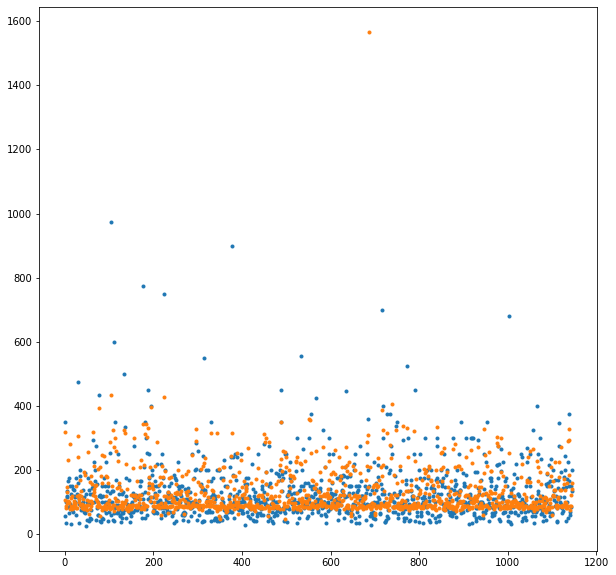

In [23]:
plt.figure(figsize=(10,10))
plt.plot(price, marker = '.', linestyle = '' )

* Difference between actual values and predicted values. The trend almost sits flat at 0, with a few variations here and there which can be further reduced by strengthening the keras deep learning model and further cleaning the raw data properly.

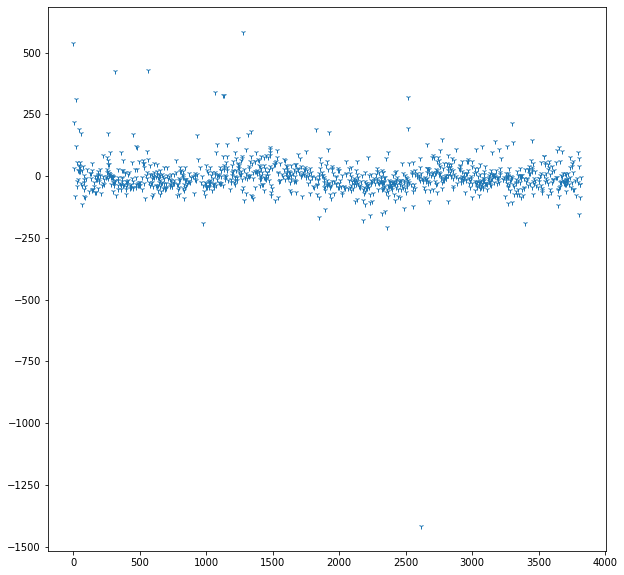

In [24]:
plt.figure(figsize=(10,10))
plt.plot(y_test - preds_round, marker='1', linestyle='')